In [1]:
import cv2
import numpy as np

In [2]:
face = cv2.imread('./Test/Before.png')
specs = cv2.imread('./Train/glasses.png',-1)
mustache = cv2.imread('./Train/mustache.png',-1)


In [3]:
eye_cascade = cv2.CascadeClassifier('./Train/third-party/frontalEyes35x16.xml')

In [4]:
gray_face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
eye_detect = eye_cascade.detectMultiScale(gray_face,1.3,5)
for x,y,w,h in eye_detect:
    cv2.rectangle(gray_face,(x,y),(x+w,y+h),(255,0,0),3)    

In [5]:
face = cv2.cvtColor(face,cv2.COLOR_BGR2BGRA)
specs = cv2.resize(specs,(w,h))
#x,y,c = owl.shape

In [6]:
temp = np.array(face)
#face[y-10:y+h+10,x-10:x+w+10,:] = owl[:,:,:]
r,c,cn = specs.shape
for i in range(r):
    for j in range(c):
        if specs[i,j,3] != 0:
            temp[y+i,x+j] = specs[i,j]

In [7]:
nose_cascade = cv2.CascadeClassifier('./Train/third-party/Nose18x15.xml')

In [8]:
nose_detect  = nose_cascade.detectMultiScale(gray_face,1.3,5)

In [9]:
for x,y,w,h in nose_detect:
    cv2.rectangle(gray_face,(x,y),(x+w,y+h),(255,0,0),0)

In [10]:
w-=int(w/5)
h-=int(h/5)
mustache = cv2.resize(mustache,(w,h))


In [11]:
r,c,cn = mustache.shape

In [12]:
x+=int(w/6)
y = y + int(h/2) + int(h/4)
for i in range(r):
    for j in range(c):
        if mustache[i,j,3] != 0:
            temp[y+i,x+j] = mustache[i,j]

In [13]:
temp = cv2.cvtColor(temp,cv2.COLOR_BGRA2BGR)

In [14]:
cv2.imshow("Face",face)
cv2.imshow("Converted",temp)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
print(temp.shape)

(485, 377, 3)


### For submission

In [16]:
#import pandas as pd


In [17]:
# pd deals with 2-D, but our img is in 3-D format, so we need to flatten it into shape x,3
# thats why we will flatten our image using reshape() of np
#temp = temp.reshape(-1,3)

In [18]:
'''
df = pd.DataFrame(data=temp,columns = ["Channel 1","Channel 2","Channel 3"])
df.to_csv('picture.csv',index = False)
'''

'\ndf = pd.DataFrame(data=temp,columns = ["Channel 1","Channel 2","Channel 3"])\ndf.to_csv(\'picture.csv\',index = False)\n'

In [19]:
import matplotlib.pyplot as plt

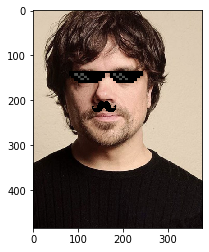

In [20]:
temp = cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
plt.imshow(temp)
plt.show()